#### COGS 108 Project

In [36]:
!pip install matplotlib==3.7.2
!pip install pandas==2.0.2
!pip install seaborn --yes


You should consider upgrading via the '/Users/sidharthsrinath/.pyenv/versions/3.9.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/sidharthsrinath/.pyenv/versions/3.9.9/bin/python3.9 -m pip install --upgrade pip' command.

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --yes


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Fetching data

link to the dataset can be found [here](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?resource=download).

In [38]:
# loading in the datatset 
# csv assumed to be in the same directory as this notebook
df_original = pd.read_csv('diabetes_prediction_dataset.csv')
df_original.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [39]:
# there are 100,000 records
df_original.shape

(100000, 9)

In [40]:
# checking for null values
df_original.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [41]:
# checking the type of each column
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [42]:
# checking the distribution of numerical values
df_original.describe()[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


In [43]:
df = df_original.copy()
df['smoking_history'] = df['smoking_history'].str.lower()

df.groupby(['gender']).count()['age'] 

gender
Female    58552
Male      41430
Other        18
Name: age, dtype: int64

In [44]:
df = df[df['gender'] != 'Other']
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,no info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#### EDA

<AxesSubplot:xlabel='diabetes', ylabel='proportion'>

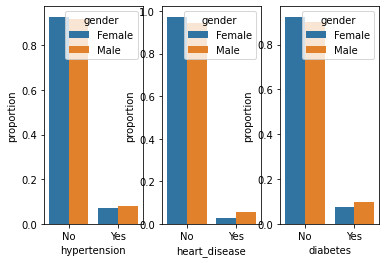

In [45]:
gen_hyp = (df.groupby(['gender'])[['hypertension']]
                        .value_counts(normalize=True)
                        .rename('proportion')
                        .rename({0:'No',1:"Yes"})
                        .reset_index()
)
gen_hd = (df.groupby(['gender'])[['heart_disease']]
                        .value_counts(normalize=True)
                        .rename('proportion')
                        .rename({0:'No',1:"Yes"})
                        .reset_index()
)
gen_d = (df.groupby(['gender'])[['diabetes']]
                        .value_counts(normalize=True)
                        .rename('proportion')
                        .rename({0:'No',1:"Yes"})
                        .reset_index()
)
fig, axs = plt.subplots(ncols=3)
sns.barplot(x='hypertension',y='proportion',hue='gender',data=gen_hyp,ax=axs[0])
sns.barplot(x='heart_disease',y='proportion',hue='gender',data=gen_hd,ax=axs[1])
sns.barplot(x='diabetes',y='proportion',hue='gender',data=gen_d,ax=axs[2])

      gender    bmi  proportion
0     Female  27.32    0.242981
1     Female  22.40    0.001400
2     Female  23.00    0.001247
3     Female  22.05    0.001230
4     Female  25.60    0.001213
...      ...    ...         ...
3984  Female  53.30    0.000017
3985  Female  53.28    0.000017
3986  Female  53.27    0.000017
3987  Female  53.21    0.000017
3988  Female  10.01    0.000017

[3989 rows x 3 columns]


<AxesSubplot:xlabel='blood_glucose_level', ylabel='proportion'>

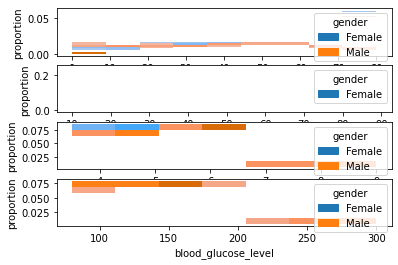

In [70]:
# average 'age', 'bmi', 'HbA1c_level', 'blood_glucose_level' by gender
gen_age = (df.groupby(['gender'])[['age']]
                        .value_counts(normalize=True)
                        .rename('proportion')
                        .reset_index()
)

gen_bmi = (df.groupby(['gender'])[['bmi']]
                        .value_counts(normalize=True)
                        .rename('proportion')
                        .reset_index()
)
gen_bmi = gen_bmi[gen_bmi['gender']=='Female']
print(gen_bmi)

gen_hba = (df.groupby(['gender'])[['HbA1c_level']]
                        .value_counts(normalize=True)
                        .rename('proportion')
                        .reset_index()
)
gen_bgl= (df.groupby(['gender'])[['blood_glucose_level']]
                        .value_counts(normalize=True)
                        .rename('proportion')
                        .reset_index()
)
fig, axs = plt.subplots(nrows=4)
sns.histplot(x='age',y='proportion',hue='gender',data=gen_age, ax=axs[0])
sns.histplot(x='bmi',y='proportion',hue='gender',data=gen_bmi,ax=axs[1],)
sns.histplot(x='HbA1c_level',y='proportion',hue='gender',data=gen_hba,ax=axs[2])
sns.histplot(x='blood_glucose_level',y='proportion',hue='gender',data=gen_bgl,ax=axs[3])

In [ ]:
# proportion of 'hypertension', 'heart_disease' by diabetes status and gender
df.groupby(['diabetes', 'gender']).mean()[['hypertension', 'heart_disease']]

/var/folders/r1/mts_mntx0m58jz5ml1zlfcjw0000gn/T/ipykernel_30377/3916702704.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['diabetes', 'gender']).mean()[['hypertension', 'heart_disease']]


hypertension  heart_disease
diabetes gender                             
0        Female      0.056923       0.019153
         Male        0.061994       0.043834
1        Female      0.250616       0.117911
         Male        0.240158       0.183461

In [ ]:
# average 'age', 'bmi', 'HbA1c_level', 'blood_glucose_level' by diabetes status and gender
df.groupby(['diabetes', 'gender']).mean()[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] # or median

/var/folders/r1/mts_mntx0m58jz5ml1zlfcjw0000gn/T/ipykernel_30377/738860662.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['diabetes', 'gender']).mean()[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] # or median


age        bmi  HbA1c_level  blood_glucose_level
diabetes gender                                                        
0        Female  40.935065  27.022526     5.391509           132.811429
         Male    38.934209  26.691107     5.404354           132.908668
1        Female  60.993499  32.623898     6.939879           193.942838
         Male    60.894776  31.286467     6.929512           194.262441

In [ ]:
# create age group bins to explore features by age group
# justify and/or change ages chosen here
bins = pd.cut(df['age'], [0, 5, 13, 18, 30, 45, 60, 80]) 
df['age_group'] = bins

In [ ]:
# proportion of 'hypertension', 'heart_disease', 'diabetes' by age group
df.groupby('age_group').mean()[['hypertension', 'heart_disease', 'diabetes']]

/var/folders/r1/mts_mntx0m58jz5ml1zlfcjw0000gn/T/ipykernel_30377/80713772.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('age_group').mean()[['hypertension', 'heart_disease', 'diabetes']]


,hypertension,heart_disease,diabetes
age_group,,,
"(0, 5]",0.000159,0.000159,0.001276
"(5, 13]",0.000427,0.000569,0.004979
"(13, 18]",0.001178,0.000000,0.009619
"(18, 30]",0.008090,0.000652,0.013636
"(30, 45]",0.041902,0.006951,0.045328
"(45, 60]",0.105177,0.038068,0.114160
"(60, 80]",0.175271,0.124027,0.199687


In [ ]:
# average 'bmi', 'HbA1c_level', 'blood_glucose_level' by age group
df.groupby('age_group').mean()[['bmi', 'HbA1c_level', 'blood_glucose_level']] # or median

/var/folders/r1/mts_mntx0m58jz5ml1zlfcjw0000gn/T/ipykernel_30377/3980203525.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('age_group').mean()[['bmi', 'HbA1c_level', 'blood_glucose_level']] # or median


,bmi,HbA1c_level,blood_glucose_level
age_group,,,
"(0, 5]",18.691292,5.407208,132.498007
"(5, 13]",21.110745,5.424822,133.264438
"(13, 18]",24.963320,5.407087,133.620338
"(18, 30]",27.229268,5.401142,133.935408
"(30, 45]",29.050945,5.468747,135.056102
"(45, 60]",29.495225,5.578360,139.937205
"(60, 80]",28.481819,5.699678,145.359428


In [ ]:
# proportion of 'heart_disease', 'diabetes' by hypertension status
df.groupby('hypertension').mean()[['heart_disease', 'diabetes']]

/var/folders/r1/mts_mntx0m58jz5ml1zlfcjw0000gn/T/ipykernel_30377/1882427524.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('hypertension').mean()[['heart_disease', 'diabetes']]


,heart_disease,diabetes
hypertension,,
0,0.032715,0.069321
1,0.122378,0.278958


In [ ]:
# proportion of 'hypertension', 'diabetes' by heart_disease status
df.groupby('heart_disease').mean()[['hypertension', 'diabetes']]

/var/folders/r1/mts_mntx0m58jz5ml1zlfcjw0000gn/T/ipykernel_30377/35737104.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('heart_disease').mean()[['hypertension', 'diabetes']]


,hypertension,diabetes
heart_disease,,
0,0.068399,0.075312
1,0.232369,0.321410


To do: 

- Add bins for `bmi` and see proportions and averages, similarly explore `HbA1c_level` and/or `blood_glucose_level`, using either bins for the numerical values, or by assigning levels such as `high`, `normal`, `low`, etc (see below).


- Create plots to visualize EDA.


- We are building a classifier to predict `diabetes` status of a patient, we can focus on those 18, and maybe even 13 and above, because for ages below that there are very few records as a proportion of the dataset. 


- If anyone would like to create a classifier or a regressor that predicts another feature in, or maybe even currently external to the datatset (such as `bmi_level` and not just `bmi`), I am open to suggestions. I chose `diabetes` status since it is the most obvious, but also for this dataset, the most reasonable variable to try to predict.

#### Data Cleaning and Feature Engineering

additional data for feature engineering:
- bmi level: [cdc](https://www.cdc.gov/obesity/basics/adult-defining.html)
- hba1c level: [bmc](https://bmcendocrdisord.biomedcentral.com/articles/10.1186/s12902-019-0338-7)
- blood glucose level: [medlineplus](https://medlineplus.gov/ency/patientinstructions/000086.htm#:~:text=From%2090%20to%20130%20mg,children%20under%206%20years%20old)
- diabetes likelihood: [cdc](https://www.cdc.gov/media/releases/2017/p0718-diabetes-report.html)

can add more related / relevant links